<a href="https://colab.research.google.com/github/AnirudhChaparwal/ML-Internship-Studio/blob/master/ML_Car_Features_Project(Internship_Studio).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# **1.Import necessary libraries, modules and datadet**

In [48]:
import itertools
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter
import pandas as pd
import numpy as np
import math
from datetime import date
import calendar 
import seaborn as sns
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
from sklearn.linear_model import LogisticRegression,LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score,log_loss,jaccard_score
import matplotlib.ticker as ticker
from sklearn import preprocessing
%matplotlib inline

In [49]:
#Loading dataset
df = pd.read_csv('/content/drive/My Drive/CarData.csv')
df.head()

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


In [50]:
# Information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11914 entries, 0 to 11913
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Make               11914 non-null  object 
 1   Model              11914 non-null  object 
 2   Year               11914 non-null  int64  
 3   Engine Fuel Type   11911 non-null  object 
 4   Engine HP          11845 non-null  float64
 5   Engine Cylinders   11884 non-null  float64
 6   Transmission Type  11914 non-null  object 
 7   Driven_Wheels      11914 non-null  object 
 8   Number of Doors    11908 non-null  float64
 9   Market Category    8172 non-null   object 
 10  Vehicle Size       11914 non-null  object 
 11  Vehicle Style      11914 non-null  object 
 12  highway MPG        11914 non-null  int64  
 13  city mpg           11914 non-null  int64  
 14  Popularity         11914 non-null  int64  
 15  MSRP               11914 non-null  int64  
dtypes: float64(3), int64(5

In [51]:
#Checking Datatypes of the columns in dataset
df.dtypes

Make                  object
Model                 object
Year                   int64
Engine Fuel Type      object
Engine HP            float64
Engine Cylinders     float64
Transmission Type     object
Driven_Wheels         object
Number of Doors      float64
Market Category       object
Vehicle Size          object
Vehicle Style         object
highway MPG            int64
city mpg               int64
Popularity             int64
MSRP                   int64
dtype: object

In [52]:
# Statistical Summary of dataset
df.describe()

,Year,Engine HP,Engine Cylinders,Number of Doors,highway MPG,city mpg,Popularity,MSRP
count,11914.000000,11845.00000,11884.000000,11908.000000,11914.000000,11914.000000,11914.000000,1.191400e+04
mean,2010.384338,249.38607,5.628829,3.436093,26.637485,19.733255,1554.911197,4.059474e+04
std,7.579740,109.19187,1.780559,0.881315,8.863001,8.987798,1441.855347,6.010910e+04
min,1990.000000,55.00000,0.000000,2.000000,12.000000,7.000000,2.000000,2.000000e+03
25%,2007.000000,170.00000,4.000000,2.000000,22.000000,16.000000,549.000000,2.100000e+04
50%,2015.000000,227.00000,6.000000,4.000000,26.000000,18.000000,1385.000000,2.999500e+04
75%,2016.000000,300.00000,6.000000,4.000000,30.000000,22.000000,2009.000000,4.223125e+04
max,2017.000000,1001.00000,16.000000,4.000000,354.000000,137.000000,5657.000000,2.065902e+06


In [53]:
# Shape of the dataset
df.shape

(11914, 16)

In [54]:
# Number of Null values that a column containing in the dataset
df.isnull().sum()

Make                    0
Model                   0
Year                    0
Engine Fuel Type        3
Engine HP              69
Engine Cylinders       30
Transmission Type       0
Driven_Wheels           0
Number of Doors         6
Market Category      3742
Vehicle Size            0
Vehicle Style           0
highway MPG             0
city mpg                0
Popularity              0
MSRP                    0
dtype: int64

# **2.Dropping less relevance columns from dataset**

From the above output we can see that "Market Category" has more number of null vlues so we will drop the "Market Category" column and in addition to that we are going to drop some other columns which does not affect the car price and are less relevance.
Car Price does not depend on how popular it is, type of engine fuel used and on the number of doors it has. So here we are dropping "Popular", "Engine Fuel Type" and "Number of Doors" column.

In [55]:
#Droppping the columns
df=df.drop(['Market Category','Engine Fuel Type','Number of Doors'],axis=1)
df.head()

,Make,Model,Year,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,335.0,6.0,MANUAL,rear wheel drive,Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,300.0,6.0,MANUAL,rear wheel drive,Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,300.0,6.0,MANUAL,rear wheel drive,Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,230.0,6.0,MANUAL,rear wheel drive,Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,230.0,6.0,MANUAL,rear wheel drive,Compact,Convertible,28,18,3916,34500


In [56]:
df.shape

(11914, 13)

# **3.Renaming columns of dataset**

"Engine HP": "HP", "Engine Cylinders": "Cylinders", "Transmission
Type": "Transmission", "Driven_Wheels": "Drive Mode","highway MPG": "MPG-H", "city
mpg": "MPG-C", "MSRP": "Price"



In [57]:
#Renaming the columns
df.rename(columns = { "Engine HP": "HP", "Engine Cylinders": "Cylinders","Transmission Type": "Transmission", "Driven_Wheels": "Drive Mode","highway MPG": "MPG-H","city mpg": "MPG-C", "MSRP": "Price"}, inplace = True) 
df.columns

Index(['Make', 'Model', 'Year', 'HP', 'Cylinders', 'Transmission',
       'Drive Mode', 'Vehicle Size', 'Vehicle Style', 'MPG-H', 'MPG-C',
       'Popularity', 'Price'],
      dtype='object')

# **4.Dealing with duplicate and null values**

In [58]:
#Dropping the duplicate values
df1=df.drop_duplicates()
df1.shape

(11122, 13)

In [59]:
#Null Values
df1.isnull().sum()

Make              0
Model             0
Year              0
HP               69
Cylinders        30
Transmission      0
Drive Mode        0
Vehicle Size      0
Vehicle Style     0
MPG-H             0
MPG-C             0
Popularity        0
Price             0
dtype: int64

In [60]:
#Dropping null values
df2=df1.dropna()
df2.shape

(11024, 13)

# **5.Dealing with outliers**

In [61]:
#Plot boxplot on columns to know the outliers
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11024 entries, 0 to 11913
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Make           11024 non-null  object 
 1   Model          11024 non-null  object 
 2   Year           11024 non-null  int64  
 3   HP             11024 non-null  float64
 4   Cylinders      11024 non-null  float64
 5   Transmission   11024 non-null  object 
 6   Drive Mode     11024 non-null  object 
 7   Vehicle Size   11024 non-null  object 
 8   Vehicle Style  11024 non-null  object 
 9   MPG-H          11024 non-null  int64  
 10  MPG-C          11024 non-null  int64  
 11  Popularity     11024 non-null  int64  
 12  Price          11024 non-null  int64  
dtypes: float64(2), int64(5), object(6)
memory usage: 1.2+ MB


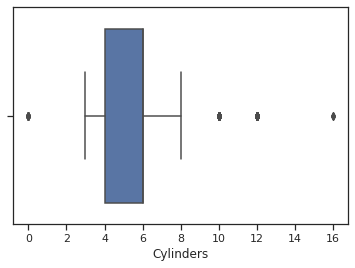

In [62]:
sns.boxplot(x=df2['Cylinders'])

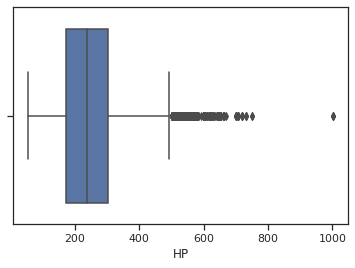

In [63]:
sns.boxplot(x=df2['HP'])

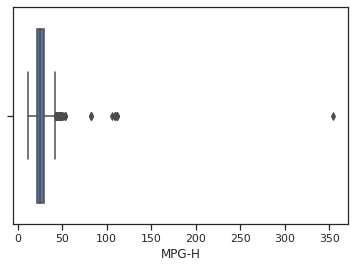

In [64]:
sns.boxplot(x=df2['MPG-H'])

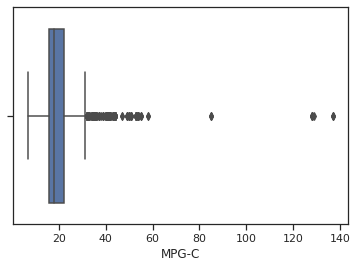

In [65]:
sns.boxplot(x=df2['MPG-C'])

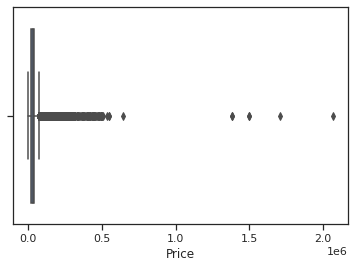

In [66]:
sns.boxplot(x=df2['Price'])

In [67]:
#Removing Outlier
q1=df2.quantile(0.25)
q3=df2.quantile(0.75)
iqr=q3-q1
iqr

Year              9.00
HP              131.00
Cylinders         2.00
MPG-H             8.00
MPG-C             6.00
Popularity     1460.00
Price         21426.25
dtype: float64

In [68]:
new_df1=df2[~((df2<(q1-1.5*iqr))|(df2>(q3+1.5*iqr))).any(axis=1)]

new_df1.shape

(8546, 13)

# **6.Top car brands-(Most represented in dataset) and average price among them**

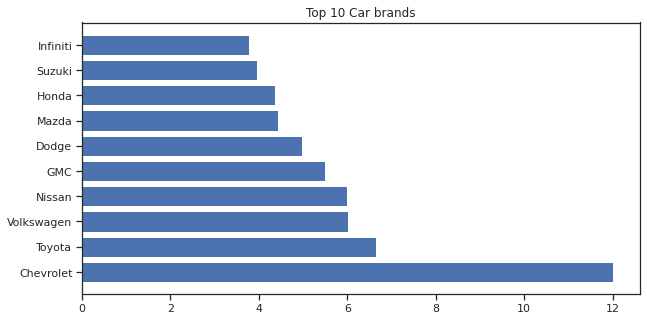

In [69]:
#Percentage of car per brand
counts=new_df1['Make'].value_counts()*100/sum(new_df1['Make'].value_counts())

#Top 10 popular brands
popularCars=counts.index[:10]

#Plotting the bar plot
plt.figure(figsize=(10,5))
plt.barh(popularCars, width=counts[:10])
plt.title('Top 10 Car brands')
plt.show()

In [70]:
#Average Price among top car brands
AvgPrice=new_df1[['Make','Price']].loc[(new_df1['Make']=='Chevrolet')|
                                     (new_df1['Make']=='Ford')|
                                     (new_df1['Make']=='Toyota')|
                                     (new_df1['Make']=='Volkswagen')|
                                     (new_df1['Make']=='Nissan')|
                                     (new_df1['Make']=='GMC')|
                                     (new_df1['Make']=='Dodge')|
                                     (new_df1['Make']=='Mazda')|
                                     (new_df1['Make']=='Honda')|
                                     (new_df1['Make']=='Suzuki')].groupby('Make').mean()
AvgPrice

,Price
Make,
Chevrolet,28142.855891
Dodge,26076.722353
GMC,33261.400853
Honda,27381.364611
Mazda,20495.820106
Nissan,28352.543860
Suzuki,18168.241888
Toyota,27769.421793
Volkswagen,29032.817476


# **7.Correlation Matrix**

In [71]:
#Correlation Matrix
new_df1.corr()

,Year,HP,Cylinders,MPG-H,MPG-C,Popularity,Price
Year,1.000000,0.325104,-0.106597,0.373319,0.335236,0.200710,0.591439
HP,0.325104,1.000000,0.734094,-0.453451,-0.554768,0.095161,0.745852
Cylinders,-0.106597,0.734094,1.000000,-0.691395,-0.746361,0.013373,0.389049
MPG-H,0.373319,-0.453451,-0.691395,1.000000,0.936978,0.093002,-0.121262
MPG-C,0.335236,-0.554768,-0.746361,0.936978,1.000000,0.081110,-0.197330
Popularity,0.200710,0.095161,0.013373,0.093002,0.081110,1.000000,0.113604
Price,0.591439,0.745852,0.389049,-0.121262,-0.197330,0.113604,1.000000


1.High correlation between 


*   HP and Cylinders
*   Highway MPG(MPG-H) and City MPG(MPG-C)
*   Price and Year
*   Price and HP
*   Price and cylinder





1.   The more cylinders there are, more powerfull the car is. 
2.   If the hiwghway mileage is hig then the city mileage is also high.
1.   The more cylinders there are, more powerfull the car is hence the price is also high.













# **8.Exploratory Data Analysis on dataset**

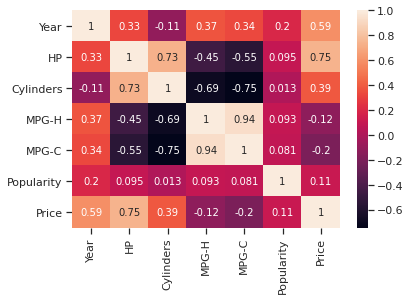

In [72]:
#HeatMap
new_df1_corr=new_df1.corr()
sns.heatmap(new_df1_corr,annot=True)

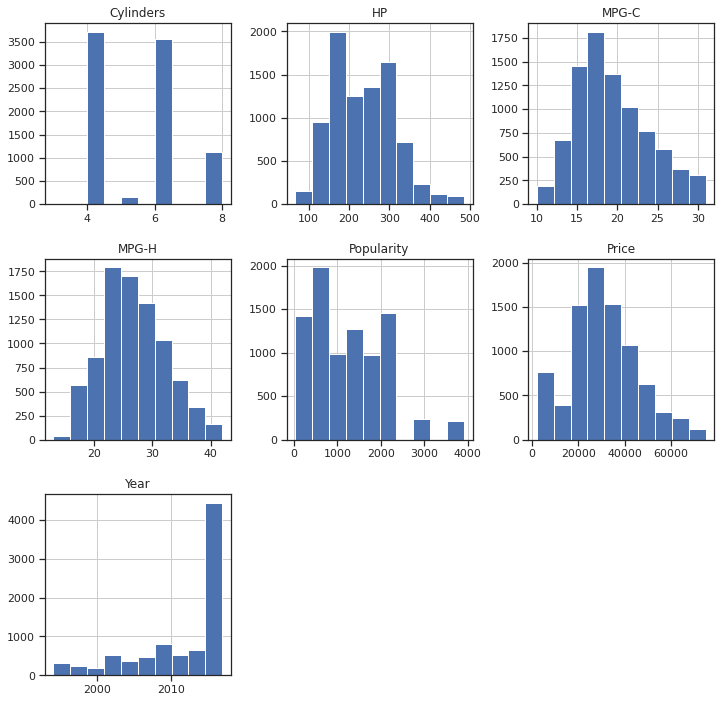

In [73]:
#Exploratory Data Analysis
new_df1.hist(figsize=(12,12))
plt.show()

<Figure size 1800x1440 with 0 Axes>

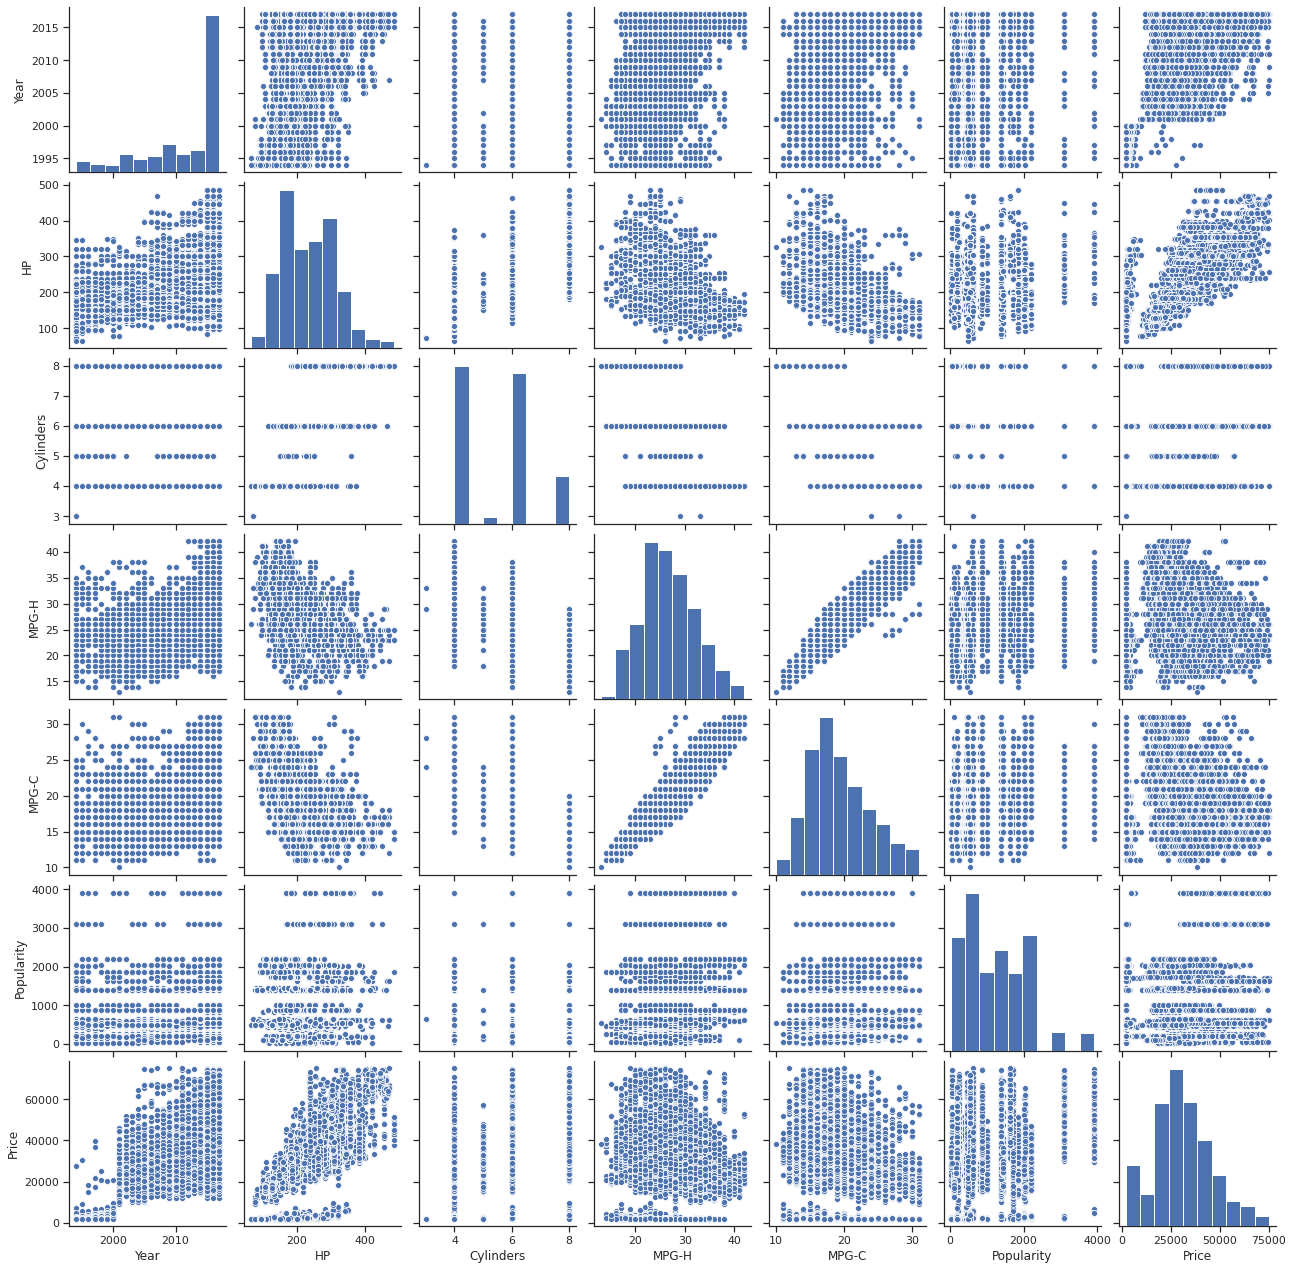

<Figure size 1800x1440 with 0 Axes>

In [74]:
#Pair Plot
sns.set(style="ticks", color_codes=True)
sns.pairplot(new_df1)

plt.figure(figsize=(25,20))

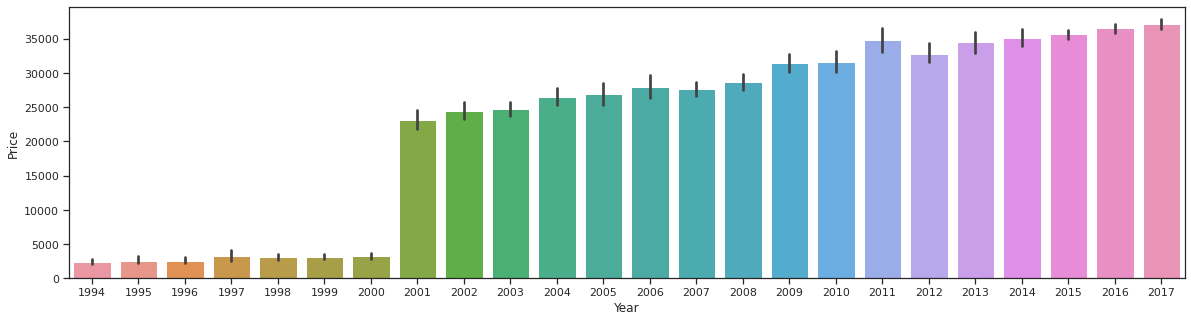

In [75]:
plt.figure(figsize=(20,5))
sns.barplot(new_df1['Year'],new_df1['Price'])

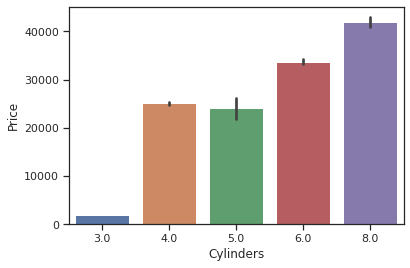

In [76]:
sns.barplot(new_df1['Cylinders'],new_df1['Price'])

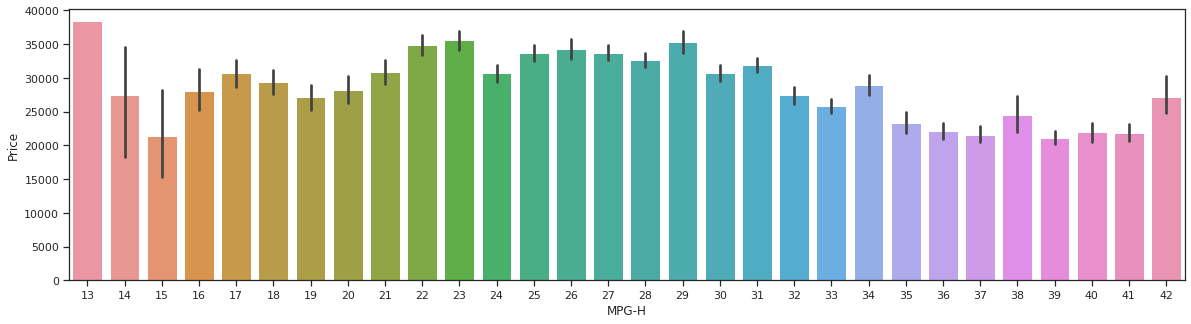

In [77]:
plt.figure(figsize=(20,5))
sns.barplot(new_df1['MPG-H'],new_df1['Price'])

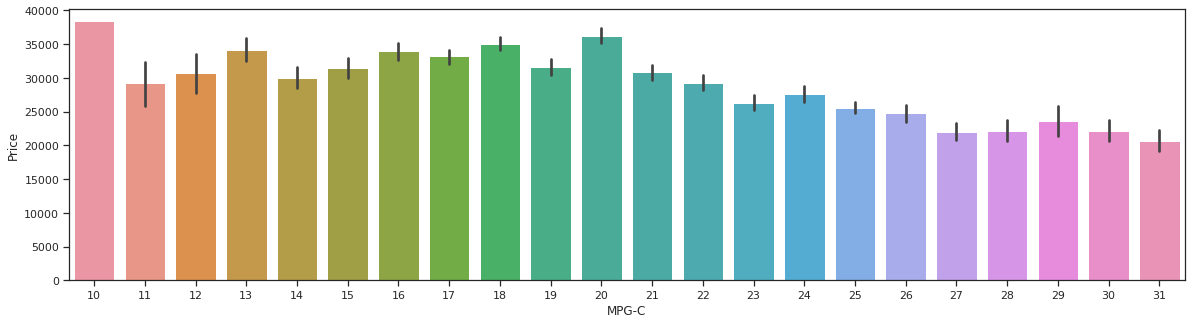

In [78]:
plt.figure(figsize=(20,5))
sns.barplot(new_df1['MPG-C'],new_df1['Price'])

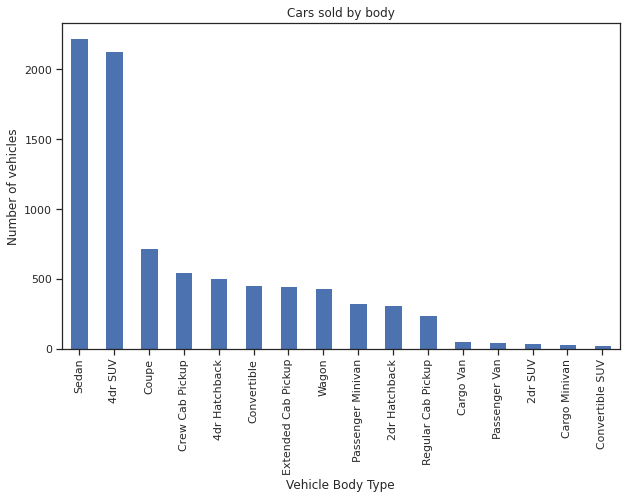

In [79]:
#Vehicle type segment of cars sold the most
new_df1['Vehicle Style'].value_counts().plot.bar(figsize=(10,6))                      # Bar chart for car 'body' variable
plt.title("Cars sold by body")
plt.ylabel('Number of vehicles')
plt.xlabel('Vehicle Body Type');

From above graph we can see that 

1.   Sedan cars were the most sold cars followed by 4dr SUV.
2.   Convertible Suv is the least sold car





Text(0.5, 0, 'Count of vehicles')

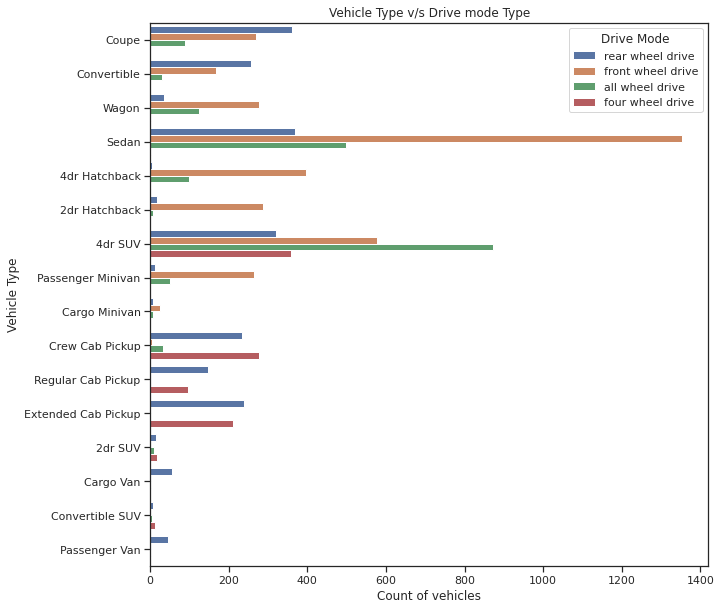

In [80]:
# Vehicle Style type and Drive type analysis
plt.figure(figsize=(10,10))
sns.countplot(y='Vehicle Style',data=new_df1, hue='Drive Mode')
plt.title("Vehicle Type v/s Drive mode Type")
plt.ylabel('Vehicle Type')
plt.xlabel('Count of vehicles')

From the above chart we can see that


1.   Front wheel drive Sedan car are the most sold cars followed by All wheel drive 4dr SUV



# **9.Base ML Model(Linear Regression)**

In [81]:
new_df=df2
new_df['new_Price'] = np.log1p(new_df.Price)
new_df.drop('Price', axis=1, inplace=True)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [82]:
le=LabelEncoder()

new_df['Make']=le.fit_transform(new_df['Make'])
new_df['Model']=le.fit_transform(new_df['Model'])
new_df['Transmission']=le.fit_transform(new_df['Transmission'])
new_df['Drive Mode']=le.fit_transform(new_df['Drive Mode'])
new_df['Vehicle Size']=le.fit_transform(new_df['Vehicle Size'])
new_df['Vehicle Style']=le.fit_transform(new_df['Vehicle Style'])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row

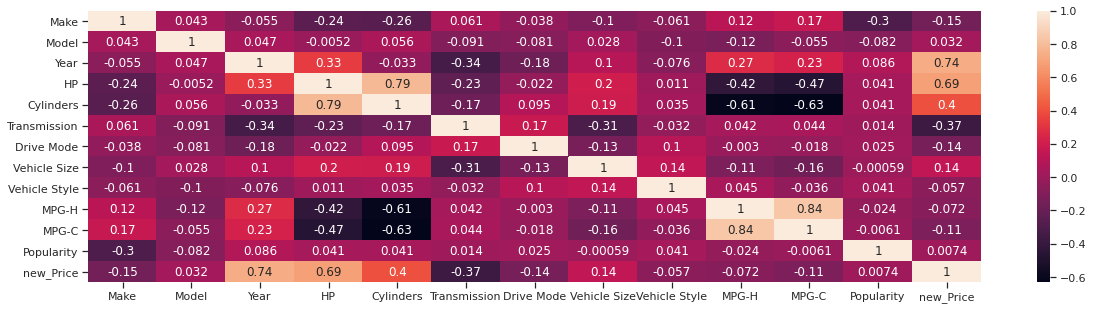

In [83]:
plt.figure(figsize=(20,5))
new_df_corr=new_df.corr()
sns.heatmap(new_df_corr,annot=True)

In [84]:
from sklearn.preprocessing import StandardScaler
X = new_df[['Year', 'HP', 'Cylinders']].values
y = new_df['new_Price'].values

sc_X = StandardScaler()
sc_y = StandardScaler()
X = sc_X.fit_transform(X)
y = sc_y.fit_transform(y.reshape(-1,1))

In [85]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=400)

#Fitting Linear Regression to dataset
from sklearn.linear_model import LinearRegression 
lm = LinearRegression()
lm.fit(X_train,y_train)

#Predicting the result
y_pred=lm.predict(X_test)

In [86]:
from sklearn import metrics

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test,y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test,y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test,y_pred)))
print('R2 Score:', metrics.r2_score(y_test, y_pred))

Mean Absolute Error: 0.3555146677656263
Mean Squared Error: 0.2184366307542911
Root Mean Squared Error: 0.46737204746785094
R2 Score: 0.7799257788652459


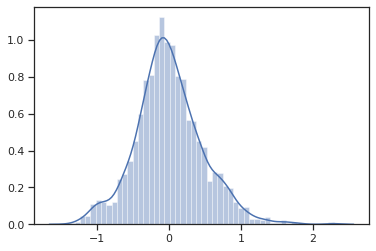

In [87]:
sns.distplot((y_test-y_pred),bins=50)

# **10.Spot Checking Algorithms**

In [88]:
#Fitting SVR to dataset
from sklearn.svm import SVR
regressor = SVR(kernel = 'rbf')
regressor.fit(X_train, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [89]:
# Predicting result
y_pred = regressor.predict(X_test)
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('R2 Score:', metrics.r2_score(y_test, y_pred))


Mean Absolute Error: 0.18964632481208207
Root Mean Squared Error: 0.26892027128358303
R2 Score: 0.927139728419209


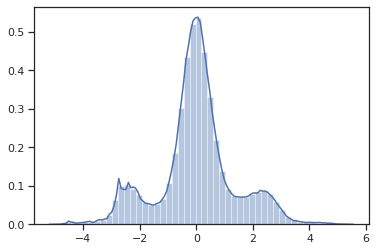

In [90]:
sns.distplot((y_test-y_pred),bins=50)

In [91]:
#Fitting Decision Tress to dataset
from sklearn.tree import DecisionTreeRegressor


var = ['new_Price','HP','Year','Cylinders','Transmission','MPG-C','Make','MPG-H','Drive Mode']
data_for_decision_tree = new_df[var]

data =data_for_decision_tree
target = "new_Price"

X = data[data.columns.difference([target])]
y = data['new_Price']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=124421)

# Fit regression model
regr_1 = DecisionTreeRegressor(max_depth=4)
regr_2 = DecisionTreeRegressor(max_depth=5)
regr_1.fit(X_train, y_train)
regr_2.fit(X_train, y_train)

# predicting the value 

y_pred1 = regr_1.predict(X_test)
y_pred2 = regr_2.predict(X_test)

print('mean_squared_error max depth 4 =',metrics.mean_squared_error(y_test,y_pred1))
print('mean_squared_error sqrt max depth 4 =',np.sqrt(metrics.mean_squared_error(y_test,y_pred1)))
print('r2_score max depth 4 =',metrics.r2_score(y_test,y_pred1))
print("\n")
print('mean_squared_error for max depth 5 =',metrics.mean_squared_error(y_test,y_pred2))
print('mean_squared_error sqrt max depth 5 =',np.sqrt(metrics.mean_squared_error(y_test,y_pred2)))
print('r2_score max depth 5 =',metrics.r2_score(y_test,y_pred2))

mean_squared_error max depth 4 = 0.06295389025385574
mean_squared_error sqrt max depth 4 = 0.25090613833434955
r2_score max depth 4 = 0.9466946350032974


mean_squared_error for max depth 5 = 0.05554717199103607
mean_squared_error sqrt max depth 5 = 0.23568447549857005
r2_score max depth 5 = 0.952966174678372


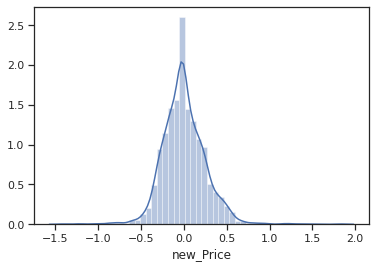

In [99]:
sns.distplot((y_test-y_pred1),bins=50)

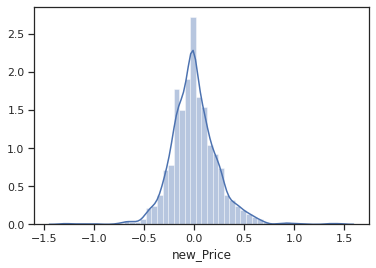

In [100]:
sns.distplot((y_test-y_pred2),bins=50)

In [92]:
# Fitting Random Forest Regression to the dataset 
# import the regressor 
from sklearn.ensemble import RandomForestRegressor 
  
 # create regressor object 
regressor = RandomForestRegressor(n_estimators = 100, random_state = 0) 
  
# fit the regressor with x and y data 
regressor.fit(X_train, y_train)  

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=0, verbose=0, warm_start=False)

In [102]:
# predicting the value 
y_pred = regressor.predict(X_test)

print('mean_squared_error regressor predict =',metrics.mean_squared_error(y_test,y_pred))
print('mean_squared_error regressor predict =',np.sqrt(metrics.mean_squared_error(y_test,y_pred)))
print('r2_score regressor predict =',metrics.r2_score(y_test,y_pred))

mean_squared_error regressor predict = 0.013926796945821279
mean_squared_error regressor predict = 0.11801185087024642
r2_score regressor predict = 0.9882076708613492


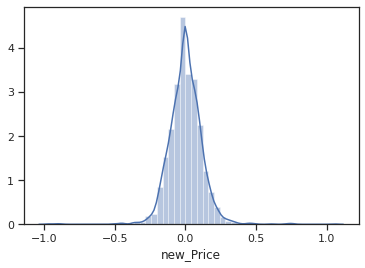

In [98]:
sns.distplot((y_test-y_pred),bins=50)

# **Conclusion**

From the above fitted diffrent models we can conclude that


1.   R2 Score of Linear Regression Model is 0.779
2.   R2 Score of SVR Model is 0.92


1.   R2 Score of Decision Tree Model


*   With max depth 4 is 0.946
*   With max deoth 5 is 0.952


2.   R2 Score of Random Forest Regressor Model is 0.998





Therefore Random Forest Regressor Model has the highest R2 Score among all the fitted model. Hence it best fits the model